TP1 Intro aux graphes

In [22]:
import numpy as np

1. Première manipulation de graphes

1.1 Matrice d'adjacence

1.2 Affichage du diagramme d'un graphe

In [23]:
from dirmaths import *

[[0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [1 0 0 0]]


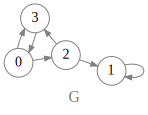

In [24]:
M = np.array([[0,0,1,1],
              [0,1,0,0],
              [0,1,0,1],
              [1,0,0,0]])
print(M)
display(M,directed=True,title='G')

1.3 Création et modification d'un graphe

1) Construction d'un graphe

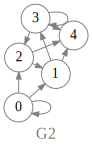

In [25]:
# A partir de la matrice nulle :
M2 = np.zeros((5,5))
M2[0,0]=M2[0,1]=M2[0,2]=M2[1,3]=M2[1,4]=M2[2,1]=M2[2,4]=M2[3,2]=M2[3,4]=M2[3,3]=1
#
# En construisant la matrice :
M2bis = np.array([[1,1,1,0,0],[0,0,0,1,1],[0,1,0,0,1],[0,0,1,1,1],[0,0,0,0,0]])
display(M2,title='G2')

2) Exercices

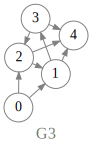

In [26]:
# Construire une fonction mat_graphe_sans_boucle(M) qui renvoie la matrice du graphe orienté de matrice M sans ses boucles.
def mat_graphe_sans_boucle(M):
    cp=M.copy()
    for i in range(len(cp)):
        cp[i,i]=0
    return cp


M3 = mat_graphe_sans_boucle(M2)
display(M3,title='G3')

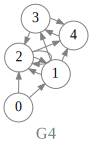

In [27]:
# Construire une fonction mat_graphe_ajoute_arcs(M,L) qui renvoie la matrice du graphe orienté de matrice M avec des arcs supplémentaires donnés par la liste de couples L.
def mat_graphe_ajoute_arcs(M,L):
    cp=M.copy()
    for elt in L:
        cp[elt]+=1
    return cp
M4 = mat_graphe_ajoute_arcs(M3,[(1,2),(2,2),(4,3)])
display(M4,title='G4')

2. Le graphe orienté

2.1 Matrice d'adjacence

[[0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]


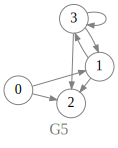

In [28]:
#Construire une fonction mat_graphe_oriente(L,n) qui retourne la matrice d'un graphe orienté à n sommets, à partir des arcs de la liste L.
def mat_graphe_oriente(L,n):
    return mat_graphe_ajoute_arcs(np.zeros((n,n)),L)
M5 = mat_graphe_oriente([(0,1),(0,2),(1,2),(1,3),(3,1),(3,2),(3,3)],4)
print(M5)
display(M5,title="G5")
    

2.2 Prédecesseur, successeur

In [29]:
#Construire une fonction successeurs(M,x) qui retourne une liste contenant les successeurs du sommet x dans le graphe orienté de matrice M.
def successeurs(M,x):
    L=[]
    for i in range(len(M)):
        if M[x,i]==1:
            L.append(i)
    return L
#Construire une fonction predecesseurs(M,x) sur le même modèle que la fonction précédente.
def predecesseurs(M,x):
    L=[]
    for i in range(len(M)):
        if M[i,x]==1:
            L.append(i)
    return L
#Construire les fonctions degre_sortant(M,x) et degre_entrant(M,x) qui retournent le degré entrant/sortant du sommet x.
def degre_sortant(M,x):
    return len(successeurs(M,x))
def degre_entrant(M,x):
    return len(predecesseurs(M,x))

print(successeurs(M5,1))
print(predecesseurs(M5,1))
print(degre_sortant(M5,3), degre_entrant(M5,3))

[2, 3]
[0, 3]
3 2


3. Le graphe non orienté

3.1 Matrice d'adjacence

[[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 1.]]


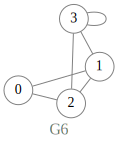

In [30]:
#Construire une fonction mat_graphe_non_oriente(L,n) qui retourne la matrice d'un graphe non orienté à n sommets, à partir des arêtes de la liste L.
def mat_graphe_non_oriente(L,n):
    M=np.zeros((n,n))
    for elt in L:
        (a,b)=elt
        M[elt]=M[b,a]=1
    return M

M6 = mat_graphe_non_oriente([(0,1),(0,2),(1,2),(1,3),(3,2),(3,3)],4)
print(M6)
display(M6,title="G6",directed=False)

3.2 Voisin

In [31]:
#Construire une fonction voisins(M,x) qui retourne une liste contenant les voisins du sommet x dans le graphe non orienté de matrice M.
def voisins(M,x):
    L=[]
    for i in range(len(M)):
        if M[x,i]==1:
            L.append(i)
    return L
#Construire une fonction degre(M,x) qui retourne le degré du sommet x.
def degre(M,x):
    L=voisins(M,x)
    res=len(L)
    if x in L:
        res+=1
    return res

print(voisins(M6,3))
print(degre(M6,2))
print(degre(M6,3))

[1, 2, 3]
3
4


4. Arbres enracinés

4.1 Exercice : racine d'un arbre enraciné

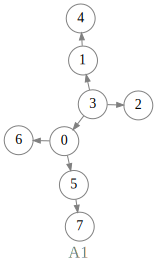

In [32]:
A1=mat_graphe_oriente([(0,6),(0,5),(1,4),(3,0),(3,1),(3,2),(5,7)],8)
display(A1,title="A1")

In [33]:
#Construire une fonction racine(arbre) qui trouve la racine d'un arbre enraciné donné sous forme matricielle.
def racine(arbre):
    i=-1
    n=1
    while n!=0:
        i+=1
        n=degre_entrant(arbre,i)
    return i

print(racine(A1))

3


4.2 Parcours

In [34]:
#Construire une fonction largeur(A) donnant le parcours en largeur d'un arbre enraciné A, donné sous forme matricielle.
def largeur(arbre):
    Visite=[]
    Racine=racine(arbre)
    File=[Racine]
    while File!=[]:
        s=File.pop(0)
        Visite.append(s)
        File+=successeurs(arbre,s)
    return Visite
#Même question avec une fonction profondeur(A).
def profondeur(arbre):
    Visite=[]
    Racine=racine(arbre)
    File=[Racine]
    while File!=[]:
        s=File.pop(0)
        Visite.append(s)
        File=successeurs(arbre,s)+File
    return Visite

print(largeur(A1))
print(profondeur(A1))

[3, 0, 1, 2, 5, 6, 4, 7]
[3, 0, 5, 7, 6, 1, 4, 2]


4.3 Exercice : liste des prédécesseurs

In [35]:
#Construire une fonction mat_arbre_depuis_pred(L) qui retourne la matrice d'un graphe enraciné, à partir de la liste L du prédecesseur de chacun des sommets (la racine aura par convention le prédécesseur -1).
def mat_arbre_depuis_pred(L):
    L=L.copy()
    for i in range(len(L)):
        if L[i]==-1:
            a=i
        else:
            L[i]=(L[i],i)
    del L[a]
    return mat_graphe_oriente(L,len(L)+1)

T = mat_arbre_depuis_pred(L)
print(T)
display(T,title='T')

NameError: name 'L' is not defined

5. Surf aléatoire

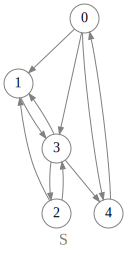

In [37]:
S=mat_graphe_oriente([(0,1),(0,3),(0,4),(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,0)],5)
display(S,title="S",dispo="dot")

In [ ]:
#Construire une fonction transition(G) qui calcule, pour un graphe G donné sous forme matricielle, sa matrice de transition Mt.
def transition(G):
    M=G.copy()
    for i in range(len(M)):
        div=degre_sortant(M,i)
        for j in range(len(M[i])):
            if div!=0:
                M[i,j]/=div
    return M

Mt=transition(S)
print(Mt)

In [ ]:
def puissance(A,p):
    B=A.copy()
    for i in range(p-1):
        A=np.dot(A,B)
    return A
#Calculer les probabilités de se trouver aux différents sommets de S après 1 déplacement.
def parcours_aleatoire(Mt,n):
    P0 = (1, 0, 0, 0, 0)
    M=puissance(Mt,n)
    return np.dot(P0,M)
print("Pour un déplacement : ",parcours_aleatoire(Mt,1))
print("Pour dix déplacements : ",parcours_aleatoire(Mt,10))
print("Pour vingt déplacements : ",parcours_aleatoire(Mt,20))
print("Pour cinquante déplacements : ",parcours_aleatoire(Mt,50))
print("Pour cent déplacements : ",parcours_aleatoire(Mt,100))

On constate qu'à partir d'un très grand nombre de déplacements, les probabilité d'être à un endroit deviennent indépendante du nombre de déplacement effectués.

6. Bonus: parcours d'un graphe quelconque

In [40]:
# Construire une fonction largeur_graphe(G,sommet) donnant le parcours en 
# largeur d'un graphe orienté quelconque G donné sous forme matricielle. 
# Le paramètre sommet sera le premier sommet à visiter.
def largeur_graphe(G,sommet):
    Visite=[]
    File=[sommet]
    while File!=[]:
        s=File.pop(0)
        Visite.append(s)
        vartemp=successeurs(G,s)
        for elt in vartemp:
            if elt not in File and elt not in Visite:
                File.append(elt)
    return Visite
print(largeur_graphe(S,0))
def profondeur_graphe(G,sommet):
    Visite=[]
    File=[sommet]
    while File!=[]:
        s=File.pop(0)
        Visite.append(s)
        vartemp=successeurs(G,s)
        Ajouts=[]
        for elt in vartemp:
            if elt not in File and elt not in Visite:
                Ajouts.append(elt)
        File=Ajouts+File
    return Visite
print(profondeur_graphe(S,0))

[0, 1, 3, 4, 2]
[0, 1, 3, 2, 4]
